# SMOTE (Synthetic Minority Over-sampling Technique)

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
%matplotlib inline
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
import numpy as np
from scipy.stats import kurtosis, skew

In [125]:
dataset = pd.read_csv("Institute-of-Computer-Studies-Graduate-Tracer-Study-2021-2022-Responses(ALTERED).csv")

In [126]:
IT_FEATURES = [
     'Sex',
     'Shiftee',
     'ComProg_1_1st',
     'ComProg_1_2nd',
     'ComProg_2_1st',
     'ComProg_2_2nd',
     'Intro_to_Computing_1st',
     'Intro_to_Computing_2nd',
     'Info_Management_1st',
     'Info_Management_2nd',
     'Operating_System_1st',
     'Operating_System_2nd',
     'Elective_1_1st',
     'Elective_1_2nd',
     'Elective_2_1st',
     'Elective_2_2nd',
     'Elective_3_1st',
     'Elective_3_2nd',
     'Data_Structures_1st',
     'Data_Structures_2nd',
     'Application_Dev_and_Emerging_Tech_1st',
     'Application_Dev_and_Emerging_Tech_2nd',
     'Human_and_Computer_Integration_1st',
     'Human_and_Computer_Integration_2nd',
     'Practicum_Industry_Immersion_1st',
     'Practicum_Industry_Immersion_2nd',
     'Integrative_Programming_and_Tech_1st',
     'Integrative_Programming_and_Tech_2nd',
     'System_Integration_and_Architecture_1st',
     'System_Integration_and_Architecture_2nd',
     'Information_Assurance_and_Security_1_1st',
     'Information_Assurance_and_Security_1_2nd',
     'Information_Assurance_and_Security_2_1st',
     'Information_Assurance_and_Security_2_2nd',
     'Software_Engineering_1st',
     'Software_Engineering_2nd',
     'Networking_1_1st',
     'Networking_1_2nd',
     'Networking_2_1st',
     'Networking_2_2nd',
     'WebProg_1st',
     'WebProg_2nd'
]

IT_REFERENCE = [
     'Sex',
     'Shiftee',
     'Curriculum',
     'Units',
     'Degree_Completed',
     'ComProg_1_1st',
     'ComProg_1_2nd',
     'ComProg_2_1st',
     'ComProg_2_2nd',
     'Intro_to_Computing_1st',
     'Intro_to_Computing_2nd',
     'Info_Management_1st',
     'Info_Management_2nd',
     'Operating_System_1st',
     'Operating_System_2nd',
     'Elective_1_1st',
     'Elective_1_2nd',
     'Elective_2_1st',
     'Elective_2_2nd',
     'Elective_3_1st',
     'Elective_3_2nd',
     'Data_Structures_1st',
     'Data_Structures_2nd',
     'Application_Dev_and_Emerging_Tech_1st',
     'Application_Dev_and_Emerging_Tech_2nd',
     'Human_and_Computer_Integration_1st',
     'Human_and_Computer_Integration_2nd',
     'Practicum_Industry_Immersion_1st',
     'Practicum_Industry_Immersion_2nd',
     'Integrative_Programming_and_Tech_1st',
     'Integrative_Programming_and_Tech_2nd',
     'System_Integration_and_Architecture_1st',
     'System_Integration_and_Architecture_2nd',
     'Information_Assurance_and_Security_1_1st',
     'Information_Assurance_and_Security_1_2nd',
     'Information_Assurance_and_Security_2_1st',
     'Information_Assurance_and_Security_2_2nd',
     'Software_Engineering_1st',
     'Software_Engineering_2nd',
     'Networking_1_1st',
     'Networking_1_2nd',
     'Networking_2_1st',
     'Networking_2_2nd',
     'WebProg_1st',
     'WebProg_2nd',
     'Suggested_job_role'
]

In [127]:
CS_FEATURES = [
     'Sex',
     'Shiftee',
     'ComProg_1_1st',
     'ComProg_1_2nd',
     'ComProg_2_1st',
     'ComProg_2_2nd',
     'Intro_to_Computing_1st',
     'Intro_to_Computing_2nd',
     'Info_Management_1st',
     'Info_Management_2nd',
     'Operating_System_1st',
     'Operating_System_2nd',
     'Elective_1_1st',
     'Elective_1_2nd',
     'Elective_2_1st',
     'Elective_2_2nd',
     'Elective_3_1st',
     'Elective_3_2nd',
     'Data_Structures_1st',
     'Data_Structures_2nd',
     'Application_Dev_and_Emerging_Tech_1st',
     'Application_Dev_and_Emerging_Tech_2nd',
     'Human_and_Computer_Integration_1st',
     'Human_and_Computer_Integration_2nd',
     'Practicum_Industry_Immersion_1st',
     'Practicum_Industry_Immersion_2nd',
     'Digital_Design_1st',
     'Digital_Design_2nd',
     'Architecture_and_Organization_1st',
     'Architecture_and_Organization_2nd',
     'Programming_Languages_1st',
     'Programming_Languages_2nd',
     'Modelling_and_Simulation_1st',
     'Modelling_and_Simulation_2nd',
     'Information_Assurance_and_Security_1st',
     'Information_Assurance_and_Security_1_2nd',
     'Software_Engineering_1_1st',
     'Software_Engineering_1_2nd',
     'Software_Engineering_2_1st',
     'Software_Engineering_2_2nd',
     'Network_Management_1st',
     'Network_Management_2nd',
     'Advance_Database_1st',
     'Advance_Database_2nd',
     'WebProg_1st',
     'WebProg_2nd'
]

CS_REFERENCE = [
     'Sex',
     'Shiftee',
     'Curriculum',
     'Units',
     'Degree_Completed',
     'ComProg_1_1st',
     'ComProg_1_2nd',
     'ComProg_2_1st',
     'ComProg_2_2nd',
     'Intro_to_Computing_1st',
     'Intro_to_Computing_2nd',
     'Info_Management_1st',
     'Info_Management_2nd',
     'Operating_System_1st',
     'Operating_System_2nd',
     'Elective_1_1st',
     'Elective_1_2nd',
     'Elective_2_1st',
     'Elective_2_2nd',
     'Elective_3_1st',
     'Elective_3_2nd',
     'Data_Structures_1st',
     'Data_Structures_2nd',
     'Application_Dev_and_Emerging_Tech_1st',
     'Application_Dev_and_Emerging_Tech_2nd',
     'Human_and_Computer_Integration_1st',
     'Human_and_Computer_Integration_2nd',
     'Practicum_Industry_Immersion_1st',
     'Practicum_Industry_Immersion_2nd',
     'Digital_Design_1st',
     'Digital_Design_2nd',
     'Architecture_and_Organization_1st',
     'Architecture_and_Organization_2nd',
     'Programming_Languages_1st',
     'Programming_Languages_2nd',
     'Modelling_and_Simulation_1st',
     'Modelling_and_Simulation_2nd',
     'Information_Assurance_and_Security_1st',
     'Information_Assurance_and_Security_1_2nd',
     'Software_Engineering_1_1st',
     'Software_Engineering_1_2nd',
     'Software_Engineering_2_1st',
     'Software_Engineering_2_2nd',
     'Network_Management_1st',
     'Network_Management_2nd',
     'Advance_Database_1st',
     'Advance_Database_2nd',
     'WebProg_1st',
     'WebProg_2nd',
     'Suggested_job_role'
]

In [128]:
TARGET = 'Suggested_job_role'

In [129]:
X_IT = dataset[IT_FEATURES]
X_CS = dataset[CS_FEATURES]

In [130]:
X_IT_REF = dataset[IT_REFERENCE]
X_CS_REF = dataset[CS_REFERENCE]

In [131]:
X_IT_REF = X_IT_REF.replace(np.nan, 0)
X_CS_REF = X_CS_REF.replace(np.nan, 0)

In [132]:
X_IT_REF['Sex'] = ordinal_encoder.fit_transform(X_IT_REF[['Sex']])
X_CS_REF['Sex'] = ordinal_encoder.fit_transform(X_CS_REF[['Sex']])

X_IT_REF['Curriculum'] = ordinal_encoder.fit_transform(X_IT_REF[['Curriculum']])
X_CS_REF['Curriculum'] = ordinal_encoder.fit_transform(X_CS_REF[['Curriculum']])

X_IT_REF['Degree_Completed'] = ordinal_encoder.fit_transform(X_IT_REF[['Degree_Completed']])
X_CS_REF['Degree_Completed'] = ordinal_encoder.fit_transform(X_CS_REF[['Degree_Completed']])

X_IT_REF['Suggested_job_role'] = ordinal_encoder.fit_transform(X_IT_REF[['Suggested_job_role']])
X_CS_REF['Suggested_job_role'] = ordinal_encoder.fit_transform(X_CS_REF[['Suggested_job_role']])

In [133]:
Cat_Y = dataset[TARGET]

In [134]:
Y = dataset[TARGET]

In [135]:
X_IT = X_IT.replace(np.nan, 0)
X_CS = X_CS.replace(np.nan, 0)

In [136]:
ordinal_encoder = OrdinalEncoder()

In [137]:
X_IT.shape

(103, 42)

In [138]:
X_CS.shape

(103, 46)

In [139]:
# Predictor for IT
colListX = list(X_IT.columns)
colListX

['Sex',
 'Shiftee',
 'ComProg_1_1st',
 'ComProg_1_2nd',
 'ComProg_2_1st',
 'ComProg_2_2nd',
 'Intro_to_Computing_1st',
 'Intro_to_Computing_2nd',
 'Info_Management_1st',
 'Info_Management_2nd',
 'Operating_System_1st',
 'Operating_System_2nd',
 'Elective_1_1st',
 'Elective_1_2nd',
 'Elective_2_1st',
 'Elective_2_2nd',
 'Elective_3_1st',
 'Elective_3_2nd',
 'Data_Structures_1st',
 'Data_Structures_2nd',
 'Application_Dev_and_Emerging_Tech_1st',
 'Application_Dev_and_Emerging_Tech_2nd',
 'Human_and_Computer_Integration_1st',
 'Human_and_Computer_Integration_2nd',
 'Practicum_Industry_Immersion_1st',
 'Practicum_Industry_Immersion_2nd',
 'Integrative_Programming_and_Tech_1st',
 'Integrative_Programming_and_Tech_2nd',
 'System_Integration_and_Architecture_1st',
 'System_Integration_and_Architecture_2nd',
 'Information_Assurance_and_Security_1_1st',
 'Information_Assurance_and_Security_1_2nd',
 'Information_Assurance_and_Security_2_1st',
 'Information_Assurance_and_Security_2_2nd',
 'Softwa

In [140]:
# Predictor for CS
colListX = list(X_CS.columns)
colListX

['Sex',
 'Shiftee',
 'ComProg_1_1st',
 'ComProg_1_2nd',
 'ComProg_2_1st',
 'ComProg_2_2nd',
 'Intro_to_Computing_1st',
 'Intro_to_Computing_2nd',
 'Info_Management_1st',
 'Info_Management_2nd',
 'Operating_System_1st',
 'Operating_System_2nd',
 'Elective_1_1st',
 'Elective_1_2nd',
 'Elective_2_1st',
 'Elective_2_2nd',
 'Elective_3_1st',
 'Elective_3_2nd',
 'Data_Structures_1st',
 'Data_Structures_2nd',
 'Application_Dev_and_Emerging_Tech_1st',
 'Application_Dev_and_Emerging_Tech_2nd',
 'Human_and_Computer_Integration_1st',
 'Human_and_Computer_Integration_2nd',
 'Practicum_Industry_Immersion_1st',
 'Practicum_Industry_Immersion_2nd',
 'Digital_Design_1st',
 'Digital_Design_2nd',
 'Architecture_and_Organization_1st',
 'Architecture_and_Organization_2nd',
 'Programming_Languages_1st',
 'Programming_Languages_2nd',
 'Modelling_and_Simulation_1st',
 'Modelling_and_Simulation_2nd',
 'Information_Assurance_and_Security_1st',
 'Information_Assurance_and_Security_1_2nd',
 'Software_Engineering

In [141]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

In [142]:
X_IT['Sex'] = ordinal_encoder.fit_transform(X_IT[['Sex']])
X_CS['Sex'] = ordinal_encoder.fit_transform(X_CS[['Sex']])

In [143]:
normalized_data_IT = scaler.fit_transform(X_IT)
print(normalized_data_IT.shape)

(103, 42)


In [144]:
normalized_data_CS = scaler.fit_transform(X_CS)
print(normalized_data_CS.shape)

(103, 46)


In [145]:
normalized_data_IT

array([[ 0.78062475,  1.91880645, -0.54853581, ..., -0.09901475,
         0.52204607,  0.        ],
       [ 0.78062475, -0.52115731, -0.86242018, ..., -0.09901475,
         0.05850516,  0.        ],
       [-1.28102523,  1.91880645, -1.17630456, ..., -0.09901475,
        -0.40503575,  0.        ],
       ...,
       [ 0.78062475,  1.91880645, -0.86242018, ..., -0.09901475,
         1.44912789,  0.        ],
       [-1.28102523,  1.91880645,  0.39311733, ..., -0.09901475,
         0.05850516,  0.        ],
       [-1.28102523, -0.52115731, -1.17630456, ..., -0.09901475,
         0.05850516,  0.        ]])

In [146]:
normalized_data_CS

array([[ 0.78062475,  1.91880645, -0.54853581, ...,  0.        ,
         0.52204607,  0.        ],
       [ 0.78062475, -0.52115731, -0.86242018, ...,  0.        ,
         0.05850516,  0.        ],
       [-1.28102523,  1.91880645, -1.17630456, ...,  0.        ,
        -0.40503575,  0.        ],
       ...,
       [ 0.78062475,  1.91880645, -0.86242018, ...,  0.        ,
         1.44912789,  0.        ],
       [-1.28102523,  1.91880645,  0.39311733, ...,  0.        ,
         0.05850516,  0.        ],
       [-1.28102523, -0.52115731, -1.17630456, ...,  0.        ,
         0.05850516,  0.        ]])

In [147]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [148]:
#TRAIN-TEST SPLIT FOR IT
X_IT_train, X_IT_test, Y_IT_train, Y_IT_test = train_test_split(X_IT, Cat_Y, test_size=0.2, random_state=0)
print(X_IT_train.shape, X_IT_test.shape, Y_IT_train.shape, Y_IT_test.shape)

(82, 42) (21, 42) (82,) (21,)


In [149]:
#TRAIN-TEST SPLIT FOR CS
X_CS_train, X_CS_test, Y_CS_train, Y_CS_test = train_test_split(X_CS, Y, test_size=0.2, random_state=0)
print(X_CS_train.shape, X_CS_test.shape, Y_CS_train.shape, Y_CS_test.shape)

(82, 46) (21, 46) (82,) (21,)


## -----------------------------------------------------------------------------------------------------------------------------

In [150]:
#TRAIN-TEST SPLIT FOR IT REFERENCE
X_IT_train_REF, X_IT_test_REF, Y_IT_train_REF, Y_IT_test_REF = train_test_split(X_IT_REF, Cat_Y, test_size=0.2, random_state=0)
print(X_IT_train_REF.shape, X_IT_test_REF.shape, Y_IT_train_REF.shape, Y_IT_test_REF.shape)

(82, 46) (21, 46) (82,) (21,)


In [151]:
#TRAIN-TEST SPLIT FOR CS REFERENCE
X_CS_train_REF, X_CS_test_REF, Y_CS_train_REF, Y_CS_test_REF = train_test_split(X_CS_REF, Y, test_size=0.2, random_state=0)
print(X_CS_train_REF.shape, X_CS_test_REF.shape, Y_CS_train_REF.shape, Y_CS_test_REF.shape)

(82, 50) (21, 50) (82,) (21,)


## -----------------------------------------------------------------------------------------------------------------------------

In [152]:
Cat_Y.value_counts()

Technical Support Specialist      34
Software Engineer / Programmer    31
Administrative Assistant          25
Academician                       13
Name: Suggested_job_role, dtype: int64

(array([34., 31., 13., 25.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

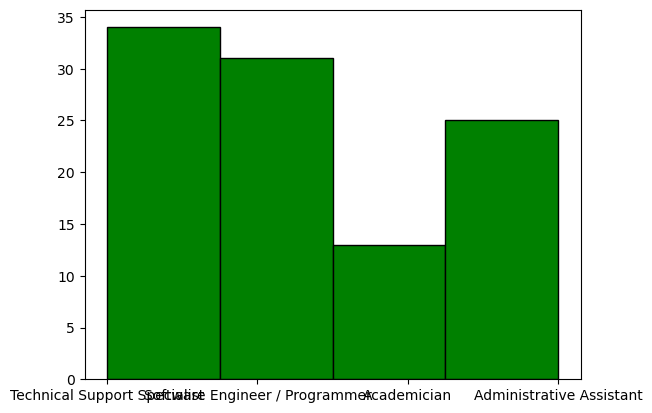

In [153]:
plt.hist(Cat_Y, bins=4, edgecolor='black', color='green')

In [ ]:
# Apply SMOTE to the training data for IT
# n_desired_minority_samples = 34

# smote = SMOTE(sampling_strategy={'Technical Support Specialist': n_desired_minority_samples, 
#                                  'Software Engineer / Programmer': n_desired_minority_samples,
#                                  'Academician': n_desired_minority_samples,
#                                  'Administrative Assistant': n_desired_minority_samples}, random_state=0)
# X_train_resampled_IT, Y_train_resampled_IT = smote.fit_resample(X_IT_train, Y_IT_train)

In [154]:
# Apply SMOTE to the training data for IT

smote = SMOTE(random_state=0)
X_train_resampled_IT, Y_train_resampled_IT = smote.fit_resample(X_IT_train, Y_IT_train)

In [155]:
X_train_IT_SMOTE = pd.DataFrame(X_train_resampled_IT)
Y_train_IT_SMOTE = pd.DataFrame(Y_train_resampled_IT)

In [156]:
# Apply SMOTE to the training data for CS

smote = SMOTE(random_state=0)
X_train_resampled_CS, Y_train_resampled_CS = smote.fit_resample(X_CS_train, Y_CS_train)

In [157]:
X_train_CS_SMOTE = pd.DataFrame(X_train_resampled_CS)
Y_train_CS_SMOTE = pd.DataFrame(Y_train_resampled_CS)

## -----------------------------------------------------------------------------------------------------------------------------

In [158]:
# Apply SMOTE to the training data for IT REFERENCE

smote = SMOTE(random_state=0)
X_train_resampled_IT_REF, Y_train_resampled_IT_REF = smote.fit_resample(X_IT_train_REF, Y_IT_train_REF)

In [160]:
X_train_IT_SMOTE_REF = pd.DataFrame(X_train_resampled_IT_REF)
Y_train_IT_SMOTE_REF = pd.DataFrame(Y_train_resampled_IT_REF)

In [159]:
# Apply SMOTE to the training data for CS REFERENCE

smote = SMOTE(random_state=0)
X_train_resampled_CS_REF, Y_train_resampled_CS_REF = smote.fit_resample(X_CS_train_REF, Y_CS_train_REF)

In [161]:
X_train_CS_SMOTE_REF = pd.DataFrame(X_train_resampled_CS_REF)
Y_train_CS_SMOTE_REF = pd.DataFrame(Y_train_resampled_CS_REF)

## -----------------------------------------------------------------------------------------------------------------------------

In [33]:
X_data_IT = pd.DataFrame(X_train_IT_SMOTE)
Y_data_IT = pd.DataFrame(Y_train_IT_SMOTE)

X_data_CS = pd.DataFrame(X_train_CS_SMOTE)
Y_data_CS = pd.DataFrame(Y_train_CS_SMOTE)

In [162]:
X_data_IT_REF = pd.DataFrame(X_train_IT_SMOTE_REF)
Y_data_IT_REF = pd.DataFrame(Y_train_IT_SMOTE_REF)

X_data_CS_REF = pd.DataFrame(X_train_CS_SMOTE_REF)
Y_data_CS_REF = pd.DataFrame(Y_train_CS_SMOTE_REF)

## -----------------------------------------------------------------------------------------------------------------------------

In [34]:
normalized_data_IT = scaler.fit_transform(X_data_IT)
print(normalized_data_IT.shape)

(112, 42)


In [35]:
normalized_data_CS = scaler.fit_transform(X_data_CS)
print(normalized_data_CS.shape)

(112, 46)


In [36]:
normalized_data_IT

array([[ 0.80825711, -0.56683827, -0.92835028, ..., -0.13478154,
        -0.88178809,  0.        ],
       [-1.44990011, -0.56683827,  0.35143739, ..., -0.13478154,
        -1.39902363,  0.        ],
       [ 0.80825711,  1.92592519,  0.77803328, ..., -0.13478154,
         0.66991855,  0.        ],
       ...,
       [ 0.80825711, -0.56683827,  1.06069736, ..., -0.13478154,
         1.1871541 ,  0.        ],
       [ 0.80825711, -0.17862962, -0.92835028, ..., -0.13478154,
         0.94550023,  0.        ],
       [ 0.80825711, -0.56683827, -1.96573869, ..., -0.13478154,
        -1.25207248,  0.        ]])

In [37]:
normalized_data_CS

array([[ 0.79377919, -0.5185514 , -0.93430064, ...,  0.        ,
        -0.87066681,  0.        ],
       [-1.42821369, -0.5185514 ,  0.34144264, ...,  0.        ,
        -1.3910085 ,  0.        ],
       [ 0.79377919,  2.03495097,  0.7666904 , ...,  0.        ,
         0.69035824,  0.        ],
       ...,
       [ 0.79377919, -0.5185514 ,  1.0484612 , ...,  0.        ,
         0.85957735,  0.        ],
       [ 0.79377919, -0.12088362, -1.65234487, ...,  0.        ,
         0.52828819,  0.        ],
       [ 0.79377919, -0.5185514 , -0.14421343, ...,  0.        ,
        -1.24317487,  0.        ]])

In [163]:
normalized_data_IT_REF = scaler.fit_transform(X_data_IT_REF)
print(normalized_data_IT_REF.shape)

(112, 46)


In [164]:
normalized_data_IT_REF = scaler.fit_transform(X_data_IT_REF)
print(normalized_data_IT_REF.shape)

(112, 46)


In [38]:
X_data_IT

,Sex,Shiftee,ComProg_1_1st,ComProg_1_2nd,ComProg_2_1st,ComProg_2_2nd,Intro_to_Computing_1st,Intro_to_Computing_2nd,Info_Management_1st,Info_Management_2nd,...,Information_Assurance_and_Security_2_1st,Information_Assurance_and_Security_2_2nd,Software_Engineering_1st,Software_Engineering_2nd,Networking_1_1st,Networking_1_2nd,Networking_2_1st,Networking_2_2nd,WebProg_1st,WebProg_2nd
0,1.000000,0.000000,1.750000,0,2.750000,0.000000,1.750000,0.0,1.750000,0.0,...,0.000000,0,2.250000,0.000000,1.750000,0.0,2.250000,0.0,1.500000,0.0
1,0.000000,0.000000,2.500000,0,3.000000,0.000000,2.250000,0.0,0.000000,0.0,...,0.000000,0,0.000000,0.000000,1.750000,0.0,2.750000,0.0,1.250000,0.0
2,1.000000,1.000000,2.750000,0,3.000000,0.000000,5.000000,2.5,2.750000,0.0,...,0.000000,0,3.000000,0.000000,3.000000,0.0,3.000000,0.0,2.250000,0.0
3,0.000000,0.000000,3.000000,0,3.000000,0.000000,2.250000,0.0,2.250000,0.0,...,0.000000,0,2.750000,0.000000,0.000000,0.0,0.000000,0.0,2.250000,0.0
4,1.000000,0.000000,1.500000,0,3.000000,0.000000,1.750000,0.0,0.000000,0.0,...,0.000000,0,2.250000,0.000000,0.000000,0.0,0.000000,0.0,2.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.000000,1.000000,2.705411,0,4.214430,1.518038,0.883766,0.0,2.392785,0.0,...,0.000000,0,4.214430,1.062627,0.883766,0.0,2.250000,0.0,2.544589,0.0
108,0.836079,0.000000,2.209020,0,2.500000,0.000000,2.086079,0.0,0.286862,0.0,...,0.000000,0,2.081961,0.000000,0.000000,0.0,0.000000,0.0,2.377059,0.0
109,1.000000,0.000000,2.915651,0,2.915651,0.000000,2.915651,0.0,1.822161,0.0,...,0.000000,0,5.000000,2.750000,0.000000,0.0,0.000000,0.0,2.500000,0.0
110,1.000000,0.155734,1.750000,0,2.516399,0.000000,2.077867,0.0,2.805332,0.0,...,1.922133,0,2.750000,0.000000,2.172133,0.0,1.655734,0.0,2.383199,0.0


In [39]:
X_data_CS

,Sex,Shiftee,ComProg_1_1st,ComProg_1_2nd,ComProg_2_1st,ComProg_2_2nd,Intro_to_Computing_1st,Intro_to_Computing_2nd,Info_Management_1st,Info_Management_2nd,...,Software_Engineering_1_1st,Software_Engineering_1_2nd,Software_Engineering_2_1st,Software_Engineering_2_2nd,Network_Management_1st,Network_Management_2nd,Advance_Database_1st,Advance_Database_2nd,WebProg_1st,WebProg_2nd
0,1.000000,0.000000,1.750000,0,2.750000,0.000000,1.750000,0.0,1.750000,0.0,...,0.0,0,0.0,0,0.000000,0.0,0.000000,0,1.500000,0.0
1,0.000000,0.000000,2.500000,0,3.000000,0.000000,2.250000,0.0,0.000000,0.0,...,2.0,0,3.0,0,0.000000,0.0,3.000000,0,1.250000,0.0
2,1.000000,1.000000,2.750000,0,3.000000,0.000000,5.000000,2.5,2.750000,0.0,...,0.0,0,0.0,0,0.000000,0.0,0.000000,0,2.250000,0.0
3,0.000000,0.000000,3.000000,0,3.000000,0.000000,2.250000,0.0,2.250000,0.0,...,0.0,0,0.0,0,2.500000,0.0,0.000000,0,2.250000,0.0
4,1.000000,0.000000,1.500000,0,3.000000,0.000000,1.750000,0.0,0.000000,0.0,...,0.0,0,0.0,0,3.000000,0.0,0.000000,0,2.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.392785,0.607215,2.901804,0,3.821646,1.518038,0.981962,0.0,2.196392,0.0,...,0.0,0,0.0,0,2.053608,0.0,0.000000,0,2.151804,0.0
108,0.000000,0.836079,2.627059,0,2.918039,0.000000,1.459020,0.0,4.467256,0.0,...,0.0,0,0.0,0,2.081961,0.0,0.000000,0,1.959020,0.0
109,1.000000,0.000000,2.915651,0,2.662604,0.000000,2.831302,0.0,2.665651,0.0,...,0.0,0,0.0,0,1.915651,0.0,0.000000,0,2.331302,0.0
110,1.000000,0.155734,1.327867,0,1.672133,0.000000,1.655734,0.0,2.383199,0.0,...,0.0,0,0.0,0,0.000000,0.0,1.577867,0,2.172133,0.0


In [40]:
X_data_IT = X_data_IT.replace(np.nan, 0)
X_data_CS = X_data_CS.replace(np.nan, 0)

In [41]:
Y_data_IT = Y_train_resampled_IT.ravel()

In [42]:
Y_data_CS = Y_train_resampled_CS.ravel()

In [43]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Raw Data Without SMOTE')

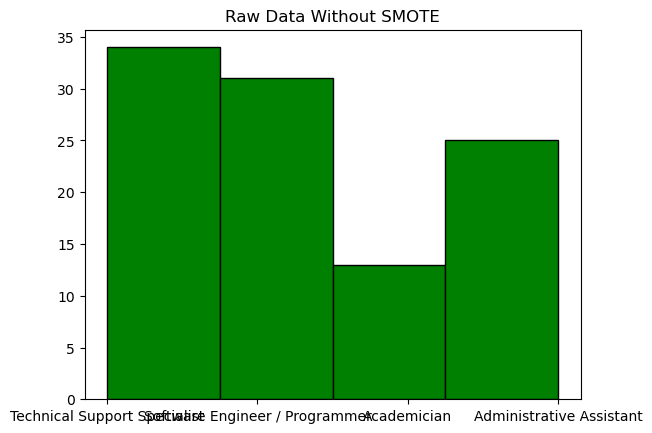

In [44]:
plt.hist(Cat_Y, bins=4, edgecolor='black', color='green')
plt.title('Raw Data Without SMOTE')

Text(0.5, 1.0, 'IT Data With SMOTE')

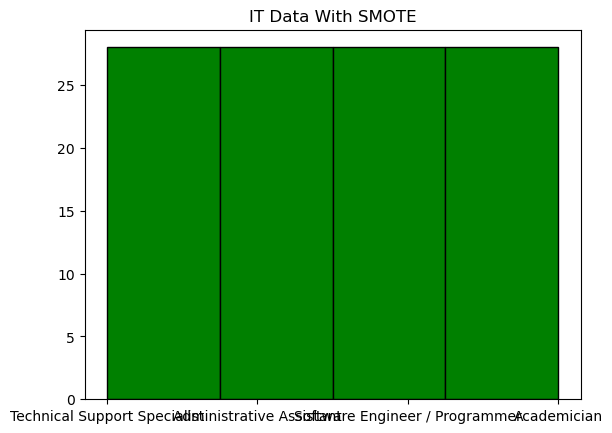

In [45]:
plt.hist(Y_data_IT, bins=4, edgecolor='black', color='green')
plt.title('IT Data With SMOTE')

Text(0.5, 1.0, 'CS Data With SMOTE')

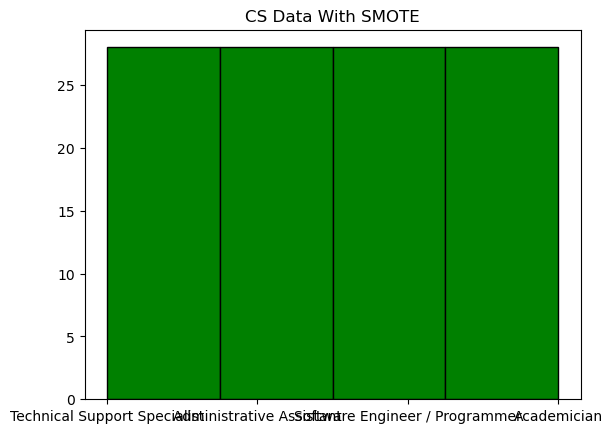

In [46]:
plt.hist(Y_data_CS, bins=4, edgecolor='black', color='green')
plt.title('CS Data With SMOTE')

## DATASET DISTRIBUTION SKEWNESS AND KURTOSIS

In [204]:
X_data_IT_DF_REF = pd.DataFrame(X_data_IT_REF)
Y_data_IT_DF_REF = pd.DataFrame(Y_data_IT_REF)

X_data_CS_DF_REF = pd.DataFrame(X_data_CS_REF)
Y_data_CS_DF_REF = pd.DataFrame(Y_data_CS_REF)

In [205]:
result_IT = pd.concat([X_data_IT_DF_REF, Y_data_IT_DF_REF], axis=1)
result_CS = pd.concat([X_data_CS_DF_REF, Y_data_CS_DF_REF], axis=1)

In [229]:
result_CS

,Sex,Shiftee,Curriculum,Units,Degree_Completed,ComProg_1_1st,ComProg_1_2nd,ComProg_2_1st,ComProg_2_2nd,Intro_to_Computing_1st,...,Software_Engineering_2_1st,Software_Engineering_2_2nd,Network_Management_1st,Network_Management_2nd,Advance_Database_1st,Advance_Database_2nd,WebProg_1st,WebProg_2nd,Suggested_job_role,Suggested_job_role
0,1.000000,0.000000,0.0,65.0,2.0,1.750000,0,2.750000,0.000000,1.750000,...,0.0,0,0.000000,0.0,0.000000,0,1.500000,0.0,3.0,3.0
1,0.000000,0.000000,1.0,82.0,2.0,2.500000,0,3.000000,0.000000,2.250000,...,3.0,0,0.000000,0.0,3.000000,0,1.250000,0.0,1.0,1.0
2,1.000000,1.000000,0.0,65.0,2.0,2.750000,0,3.000000,0.000000,5.000000,...,0.0,0,0.000000,0.0,0.000000,0,2.250000,0.0,3.0,3.0
3,0.000000,0.000000,0.0,76.0,1.0,3.000000,0,3.000000,0.000000,2.250000,...,0.0,0,2.500000,0.0,0.000000,0,2.250000,0.0,2.0,2.0
4,1.000000,0.000000,0.0,76.0,1.0,1.500000,0,3.000000,0.000000,1.750000,...,0.0,0,3.000000,0.0,0.000000,0,2.250000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.000000,0.607215,0.0,76.0,1.0,2.803608,0,3.723449,1.518038,0.785570,...,0.0,0,2.348196,0.0,0.000000,0,2.151804,0.0,1.0,1.0
108,0.836079,0.000000,0.0,76.0,1.0,2.209020,0,2.500000,0.000000,2.086079,...,0.0,0,2.081961,0.0,0.000000,0,2.377059,0.0,1.0,1.0
109,1.000000,0.000000,0.0,76.0,1.0,2.746953,0,2.831302,0.000000,2.746953,...,0.0,0,2.000000,0.0,0.000000,0,2.500000,0.0,1.0,1.0
110,1.000000,0.155734,1.0,111.0,3.0,2.172133,0,2.305332,0.000000,1.866801,...,0.0,0,0.000000,0.0,1.577867,0,1.961066,0.0,2.0,2.0


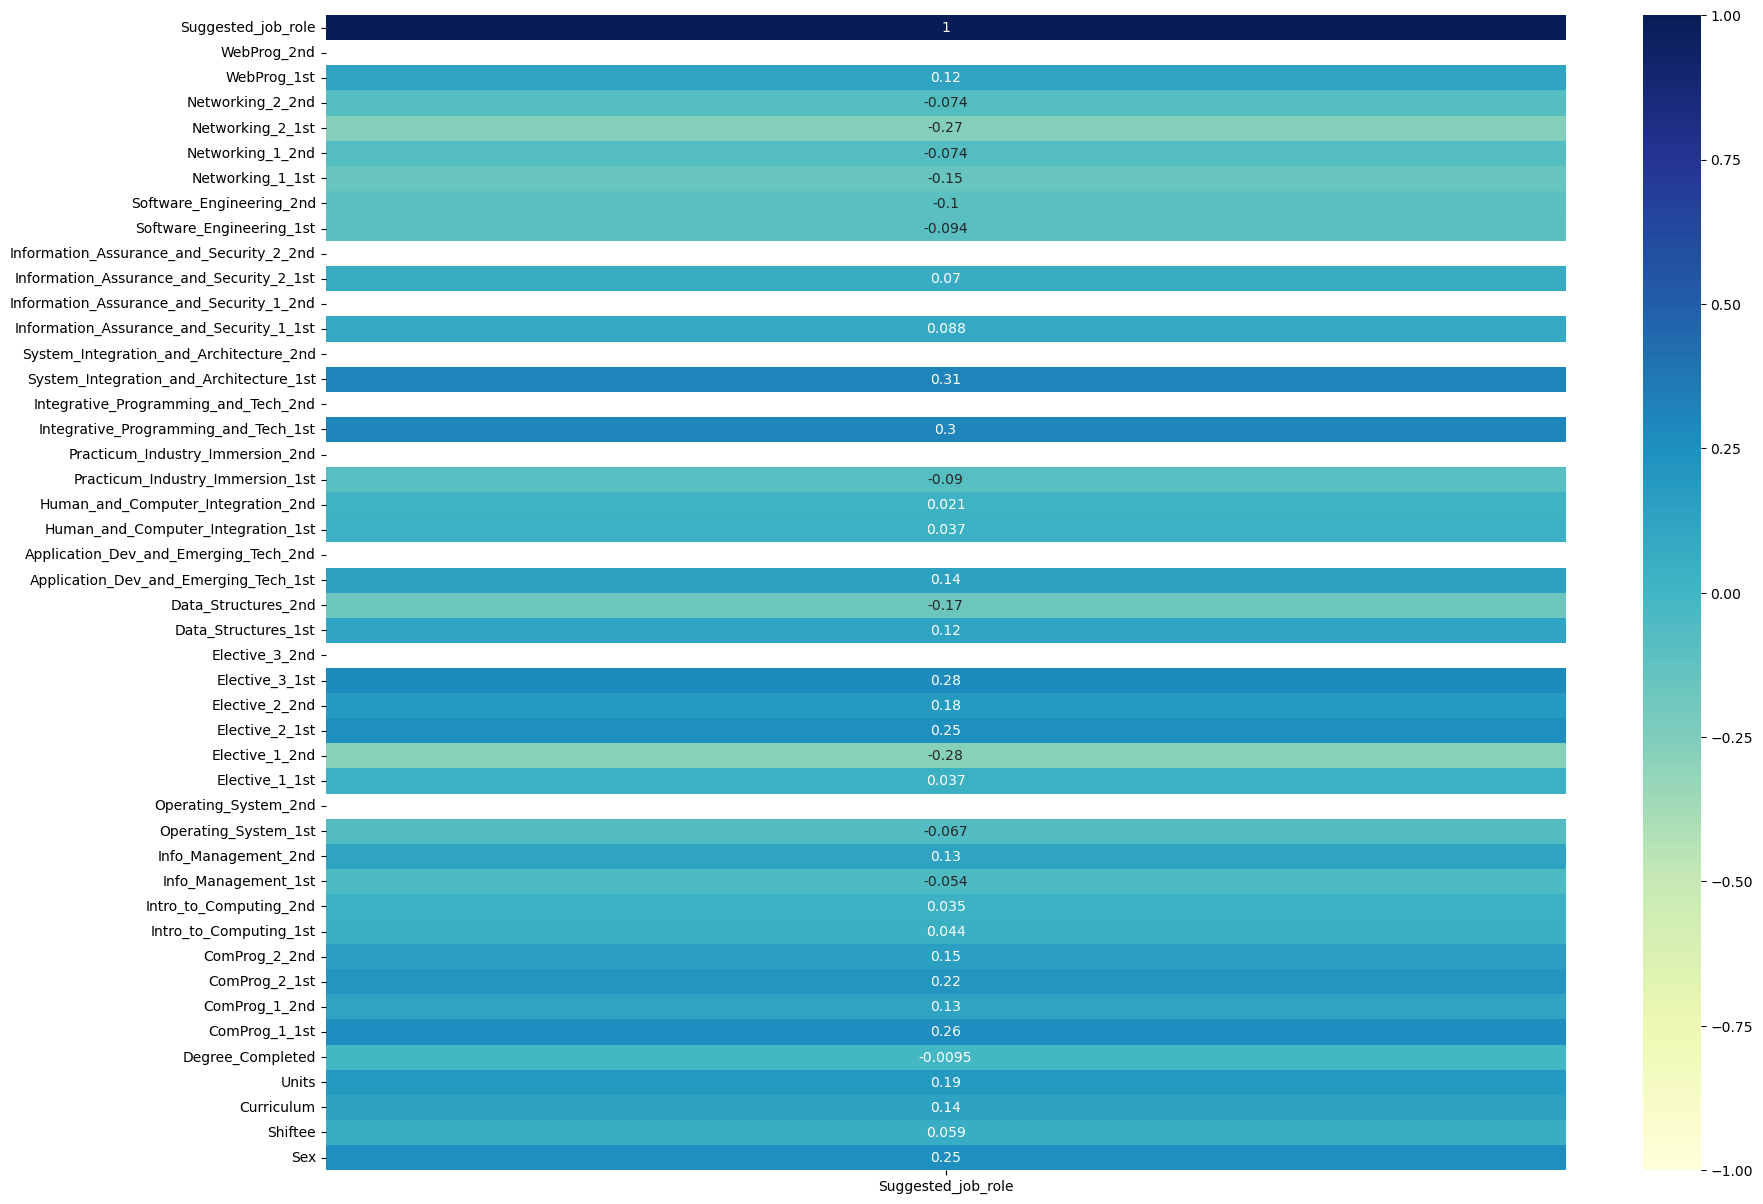

In [206]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(result_IT.corr(method="spearman")[['Suggested_job_role']], vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

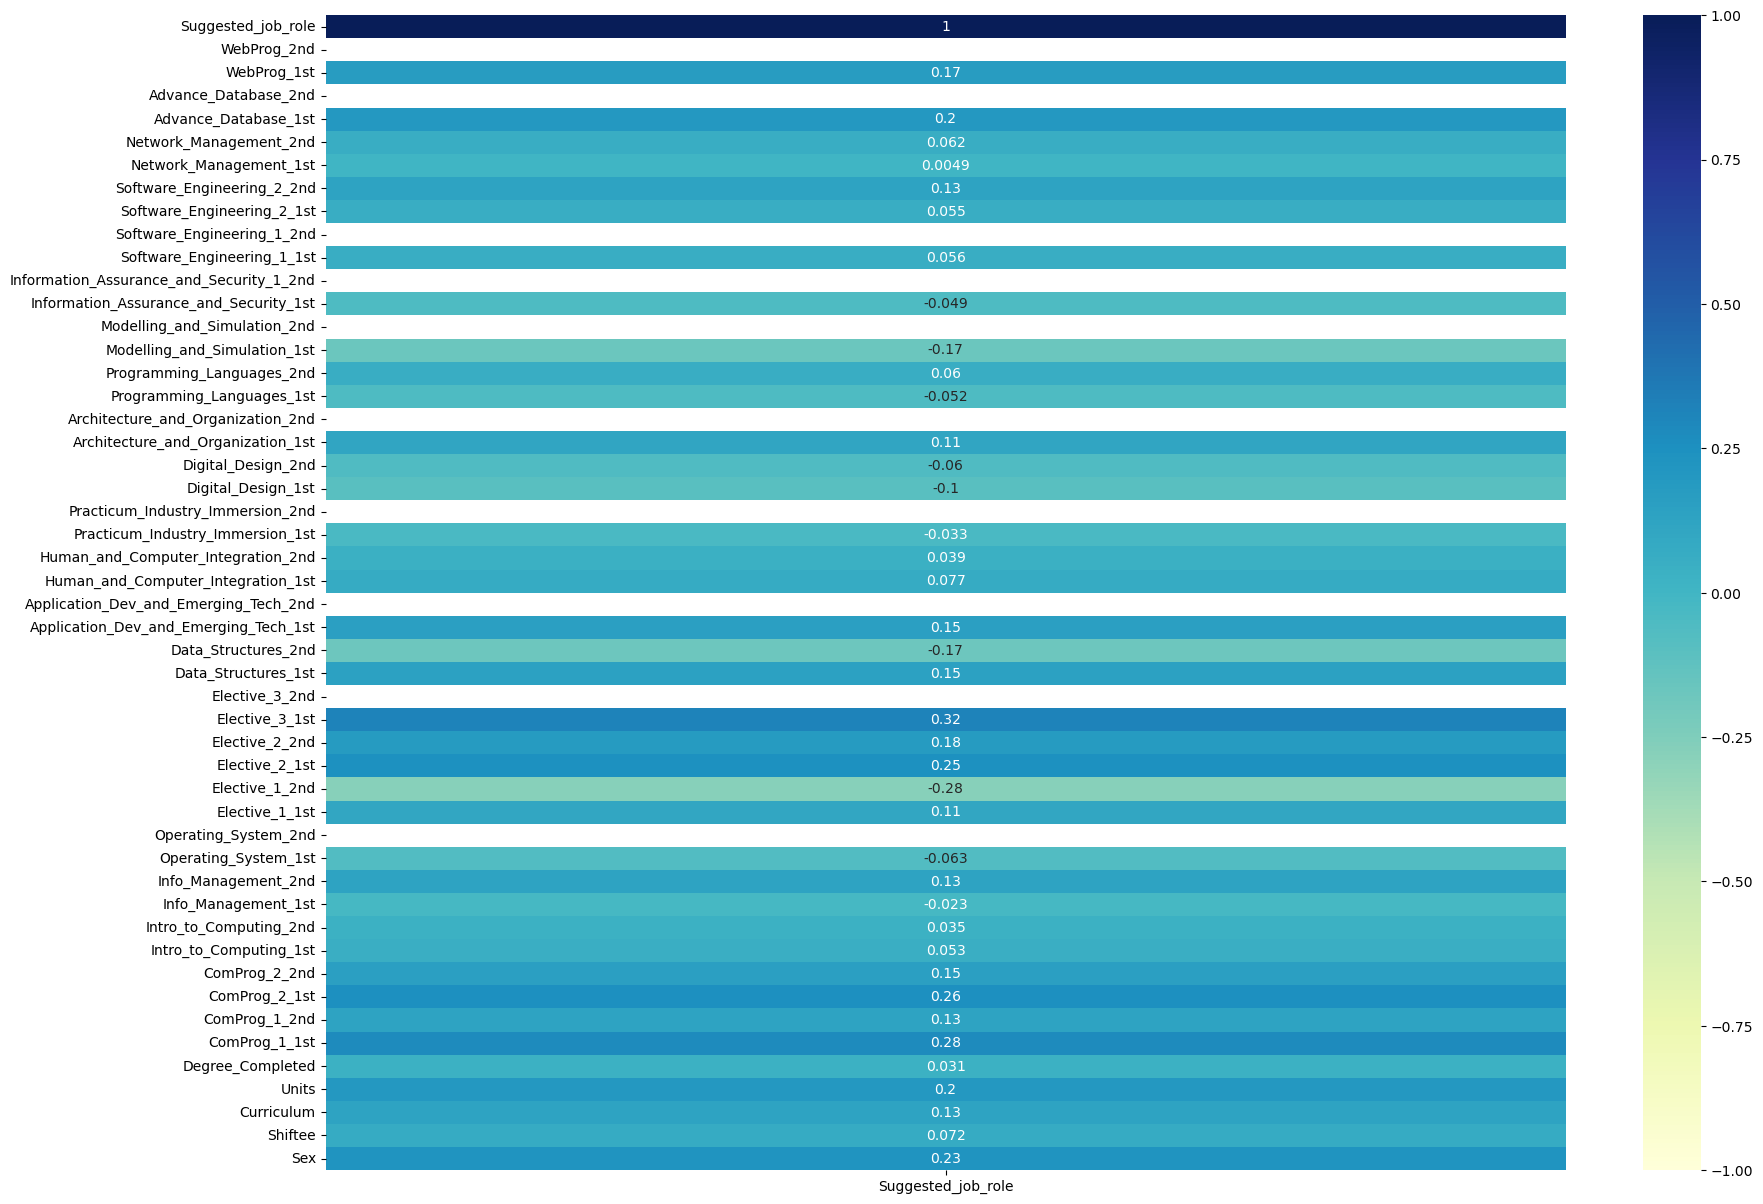

In [208]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(result_CS.corr(method="spearman")[['Suggested_job_role']], vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

ValueError: num must be 1 <= num <= 54, not 55

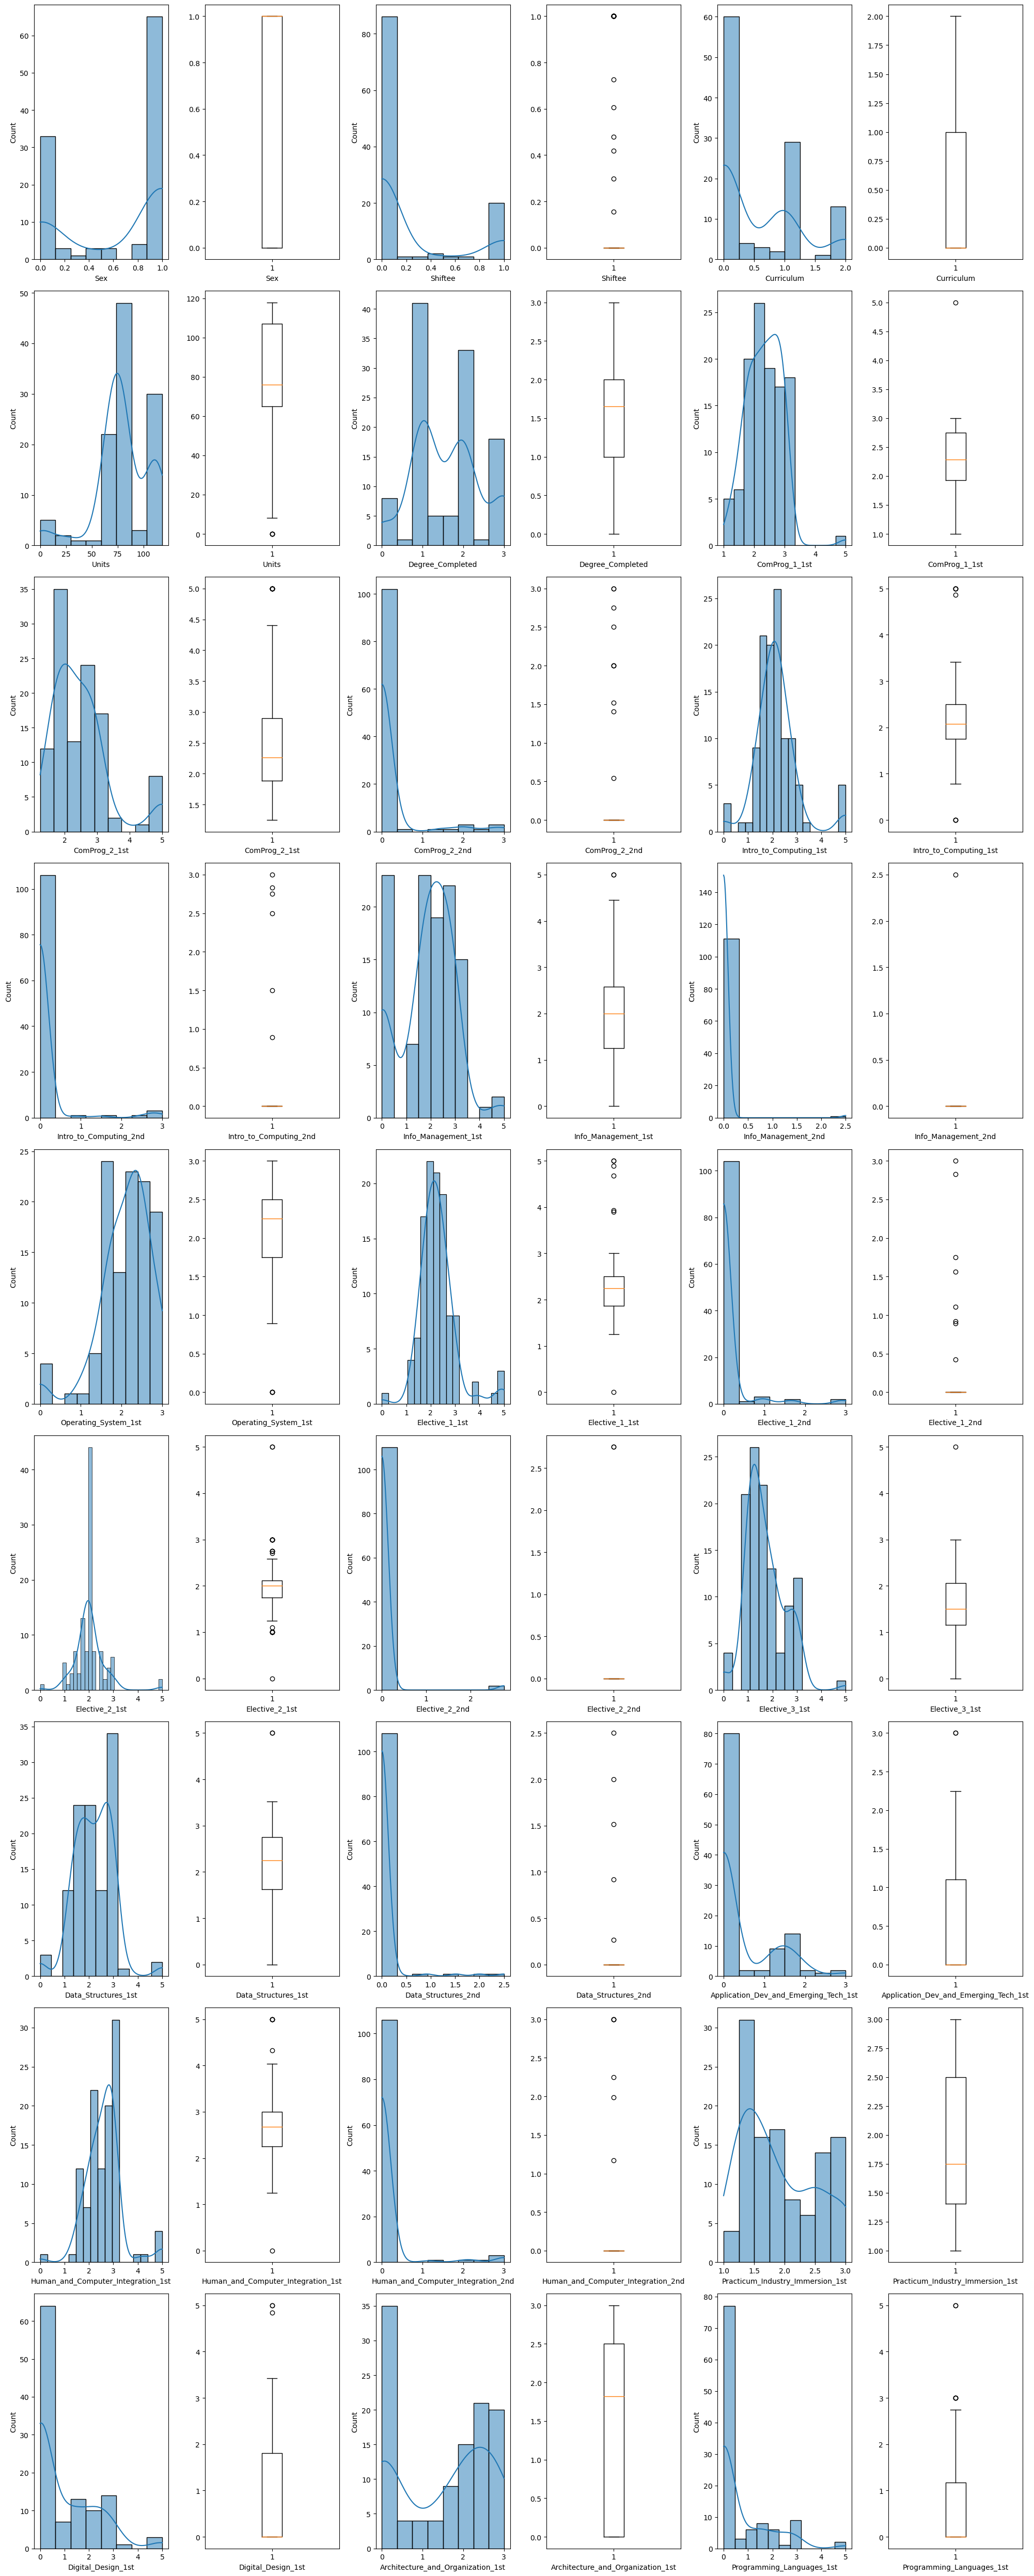

In [227]:
#Plotting numerical data for visualization 

a = 9  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in result_CS.select_dtypes(include=['float64']):
    plt.subplot(a, b, c)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel(i)
    sns.histplot(data=result_CS, x=result_CS[i], kde=True)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel(i)
    plt.boxplot(x = result_CS[i])
    plt.tight_layout()
    c = c + 1

ValueError: num must be 1 <= num <= 54, not 55

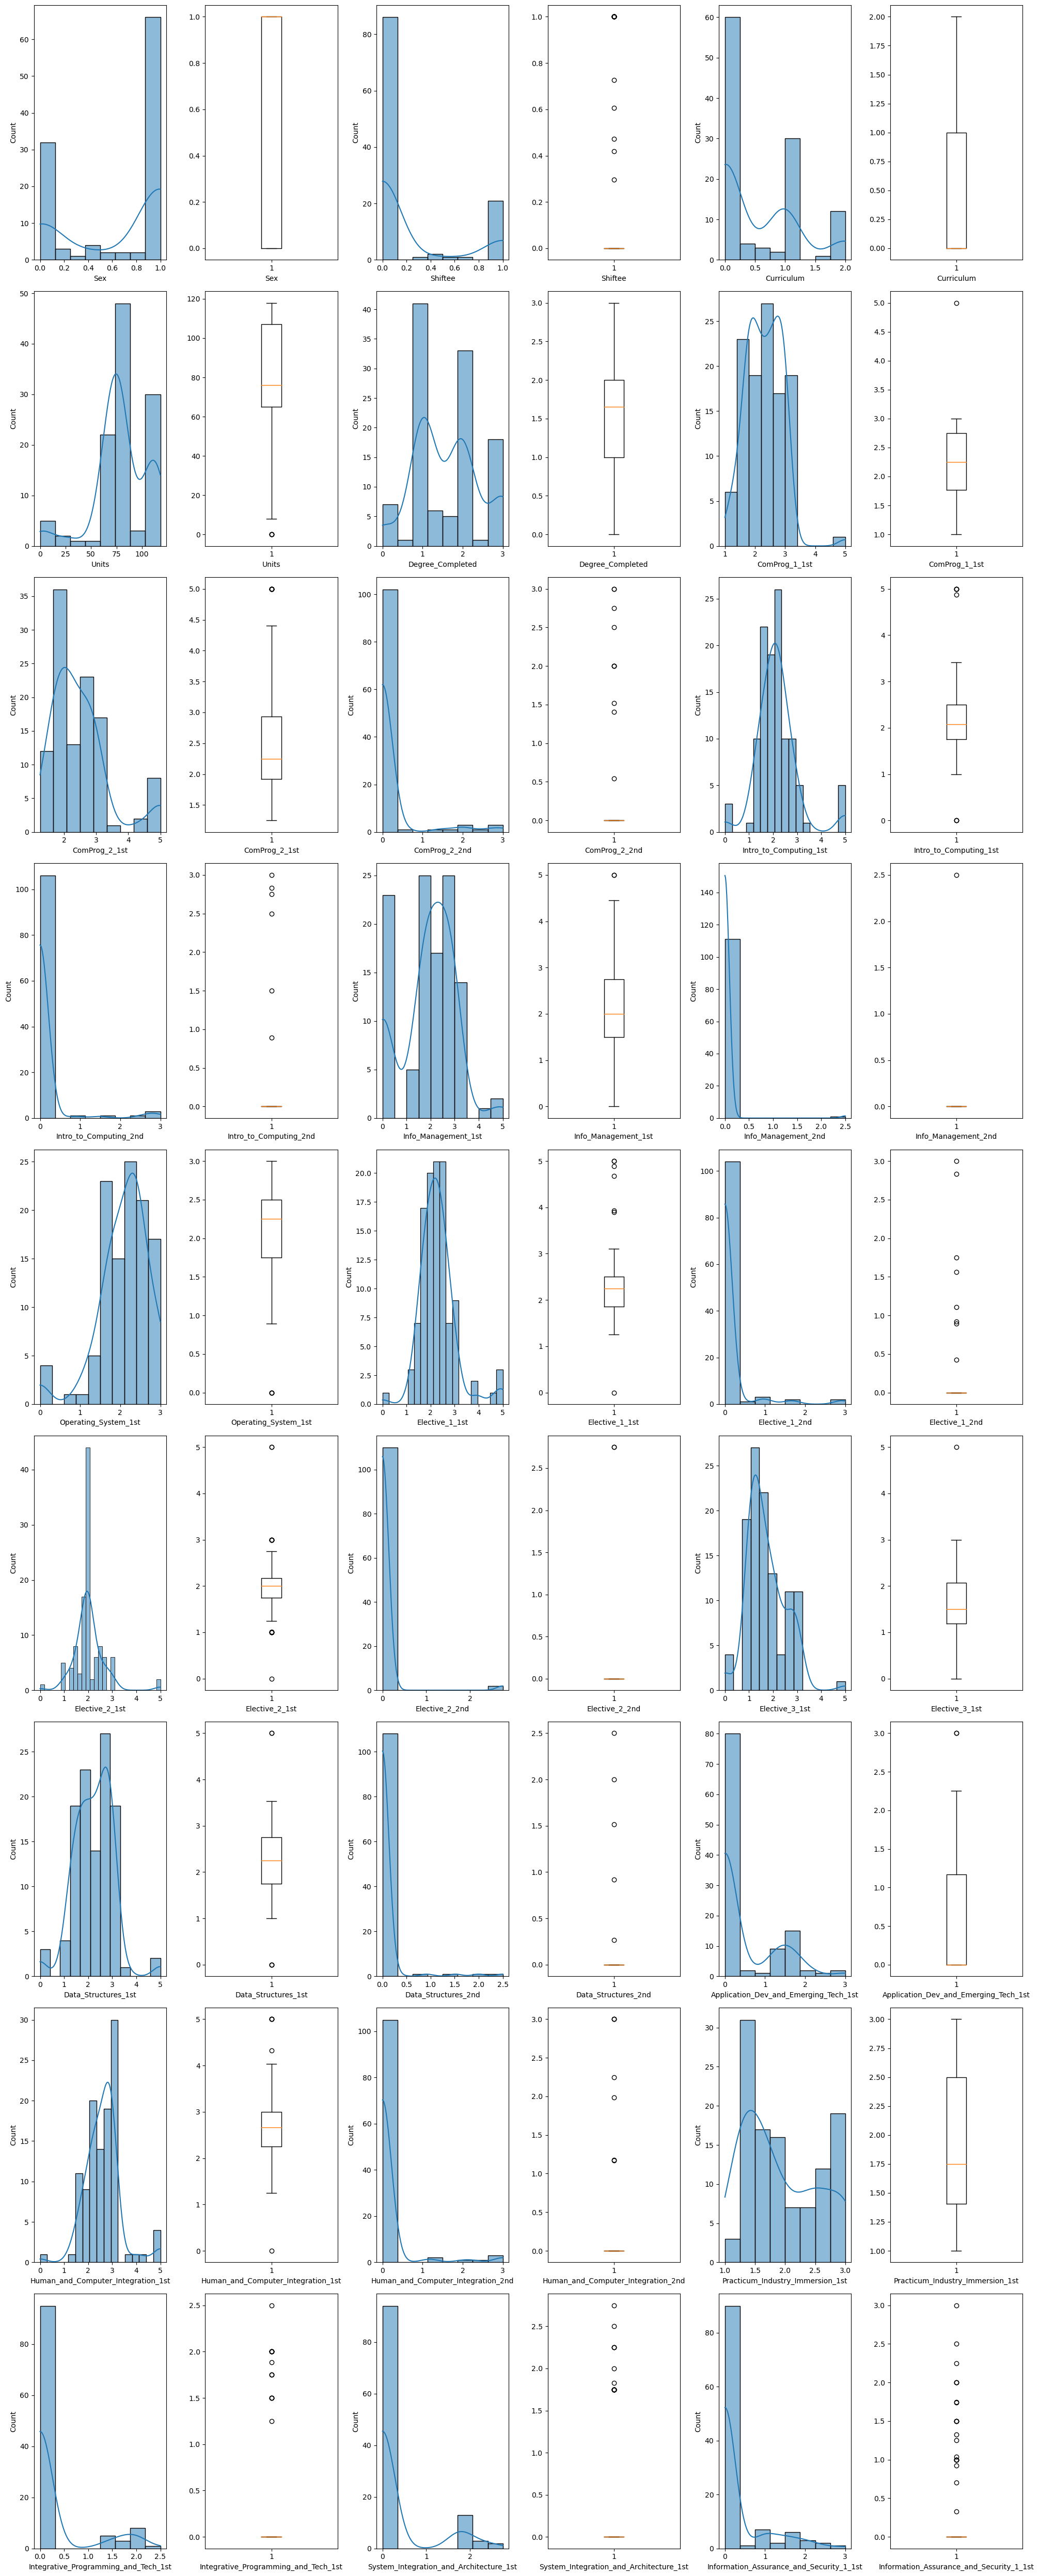

In [228]:
#Plotting numerical data for visualization 

a = 9  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in result_IT.select_dtypes(include=['float64']):
    plt.subplot(a, b, c)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel(i)
    sns.histplot(data=result_IT, x=result_IT[i], kde=True)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel(i)
    plt.boxplot(x = result_IT[i])
    plt.tight_layout()
    c = c + 1

In [213]:
result_IT['Suggested_job_role'] = ordinal_encoder.fit_transform(result_IT[['Suggested_job_role']])
result_CS['Suggested_job_role'] = ordinal_encoder.fit_transform(result_CS[['Suggested_job_role']])

# HYPERPARAMETER TUNING

In [201]:
from skopt import BayesSearchCV

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [291]:
# Define the search space
param_space1 = {'n_estimators': (10, 100),
               'max_depth': (1, 20),
               'min_samples_split': (2, 10),
               'min_samples_leaf': (1, 10)}

param_space2 = {'penalty' : ['l2', 'none'], 'C' : [i for i in range(1,80,10)], 'class_weight' : [None,'balanced'], 
                        'max_iter' : [i for i in range(400,1000,100)]}

param_space3 = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(3,7)), 'min_samples_split' : list(range(3,7)), 
                    'min_samples_leaf' : list(range(3,7)), 'max_leaf_nodes' : list(range(3,12))}

param_space4 = {'C': (np.arange(4,6,0.2)) , 'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': [0.01,0.1,1,10], 'degree': [2,3,4]}

# Initialize the model
model1 = RandomForestClassifier(random_state=0)
model2 = LogisticRegression(random_state=0)
model3 = DecisionTreeClassifier(random_state=0)
model4 = SVC(random_state=0)

# Initialize BayesSearchCV
opt1 = BayesSearchCV(model1, param_space1, n_iter=10, cv=5)
opt2 = BayesSearchCV(model2, param_space2, n_iter=10, cv=5)
opt3 = BayesSearchCV(model3, param_space3, n_iter=10, cv=5)
opt4 = BayesSearchCV(model4, param_space4, n_iter=10, cv=5)

# Fit the model
opt1.fit(X_data_IT, Y_data_IT)
opt2.fit(X_data_IT, Y_data_IT)
opt3.fit(X_data_IT, Y_data_IT)
opt4.fit(X_data_IT, Y_data_IT)

# Print the best parameters
print("Best parameters for Random Forest: ", opt1.best_params_)
print("\nBest parameters for Logistic Regression: ", opt2.best_params_)
print("\nBest parameters for Decision Tree: ", opt3.best_params_)
print("\nBest parameters for SVM: ", opt4.best_params_)

C:\Users\France\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\France\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best parameters for Random Forest:  OrderedDict([('max_depth', 13), ('min_samples_leaf', 2), ('min_samples_split', 4), ('n_estimators', 82)])

Best parameters for Logistic Regression:  OrderedDict([('C', 11), ('class_weight', 'balanced'), ('max_iter', 800), ('penalty', 'l2')])

Best parameters for Decision Tree:  OrderedDict([('criterion', 'entropy'), ('max_depth', 4), ('max_leaf_nodes', 10), ('min_samples_leaf', 3), ('min_samples_split', 5)])

Best parameters for SVM:  OrderedDict([('C', 4.4), ('degree', 2), ('gamma', 0.1), ('kernel', 'poly')])


# CLASSIFIERS

## Random Forest

In [279]:
from sklearn.ensemble import RandomForestClassifier

In [280]:
#SET ESTIMATOR AND RANDOM STATE FOR IT
rfc_IT = RandomForestClassifier(max_depth = 13, min_samples_split = 4, min_samples_leaf = 2, random_state = 0, n_estimators = 82)
rfc_IT.fit(X_data_IT, Y_data_IT)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=82, random_state=0)

In [281]:
#SET ESTIMATOR AND RANDOM STATE FOR CS
rfc_CS = RandomForestClassifier(max_depth = 13, min_samples_split = 4, min_samples_leaf = 2, random_state = 0, n_estimators = 82)
rfc_CS.fit(X_data_CS, Y_data_CS)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=82, random_state=0)

In [282]:
pred_rfc_IT = rfc_IT.predict(X_IT_test)

In [283]:
pred_rfc_CS = rfc_CS.predict(X_CS_test)

In [284]:
#K FOLD FOR IT
cv_IT = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
rfc_auc_IT = cross_val_score(rfc_IT, X_data_IT, Y_data_IT, scoring='roc_auc_ovo', cv=cv_IT, n_jobs=-1)
rfc_accuracy_IT = cross_val_score(rfc_IT, X_data_IT, Y_data_IT, scoring='accuracy', cv=cv_IT, n_jobs=-1)

In [285]:
pd.DataFrame([[accuracy_score(Y_IT_test, pred_rfc_IT), '-'],[np.mean(rfc_accuracy_IT), np.mean(rfc_auc_IT)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.142857,-
K-fold,0.607143,0.872735


In [286]:
#K FOLD FOR CS
cv_CS = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
rfc_auc_CS = cross_val_score(rfc_CS, X_data_CS, Y_data_CS, scoring='roc_auc_ovo', cv=cv_CS, n_jobs=-1)
rfc_accuracy_CS = cross_val_score(rfc_CS, X_data_CS, Y_data_CS, scoring='accuracy', cv=cv_CS, n_jobs=-1)

In [287]:
pd.DataFrame([[accuracy_score(Y_CS_test, pred_rfc_CS), '-'],[np.mean(rfc_accuracy_CS), np.mean(rfc_auc_CS)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.142857,-
K-fold,0.616071,0.829981


## Naive Bayes

In [288]:
from sklearn.naive_bayes import GaussianNB

In [289]:
naive_IT = GaussianNB()
naive_IT.fit(X_data_IT, Y_data_IT)

GaussianNB()

In [290]:
naive_CS = GaussianNB()
naive_CS.fit(X_data_CS, Y_data_CS)

GaussianNB()

In [291]:
pred_naive_IT = naive_IT.predict(X_IT_test)

In [292]:
pred_naive_CS = naive_CS.predict(X_CS_test)

### K-fold Cross Validation 10FOLDS

In [293]:
cvNaive_IT = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
naive_auc_IT = cross_val_score(naive_IT, X_data_IT, Y_data_IT, scoring='roc_auc_ovo', cv=cvNaive_IT, n_jobs=-1)
naive_accuracy_IT = cross_val_score(naive_IT, X_data_IT, Y_data_IT, scoring='accuracy', cv=cvNaive_IT, n_jobs=-1)

In [294]:
#WITH FIRST AND SECOND TRY GRADES
pd.DataFrame([[accuracy_score(Y_IT_test, pred_naive_IT), '-'],[np.mean(naive_accuracy_IT), np.mean(naive_auc_IT)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.238095,-
K-fold,0.569697,NaN


#### K-fold Cross Validation

In [295]:
cvNaive_IT = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
naive_auc_IT = cross_val_score(naive_IT, X_data_IT, Y_data_IT, scoring='roc_auc_ovo', cv=cvNaive_IT, n_jobs=-1)
naive_accuracy_IT = cross_val_score(naive_IT, X_data_IT, Y_data_IT, scoring='accuracy', cv=cvNaive_IT, n_jobs=-1)

In [296]:
#WITH FIRST AND SECOND TRY GRADES
pd.DataFrame([[accuracy_score(Y_IT_test, pred_naive_IT), '-'],[np.mean(naive_accuracy_IT), np.mean(naive_auc_IT)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.238095,-
K-fold,0.562500,0.818572


In [297]:
cvNaive_CS = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
naive_auc_CS = cross_val_score(naive_CS, X_data_CS, Y_data_CS, scoring='roc_auc_ovo', cv=cvNaive_CS, n_jobs=-1)
naive_accuracy_CS = cross_val_score(naive_CS, X_data_CS, Y_data_CS, scoring='accuracy', cv=cvNaive_CS, n_jobs=-1)

In [298]:
#WITH FIRST AND SECOND TRY GRADES
pd.DataFrame([[accuracy_score(Y_CS_test, pred_naive_CS), '-'],[np.mean(naive_accuracy_CS), np.mean(naive_auc_CS)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.285714,-
K-fold,0.455357,0.742702


## Logistic Regression

In [299]:
from sklearn.linear_model import LogisticRegression

In [300]:
tuned_parameters_log = {'penalty' : ['l2', 'none'], 'C' : [i for i in range(1,80,10)], 'class_weight' : [None,'balanced'], 
                        'max_iter' : [i for i in range(400,1000,100)]}

In [301]:
CS_log_reg = LogisticRegression(solver = 'lbfgs', random_state = 0, C= 1, class_weight= None, max_iter = 3000, penalty = 'l2')
CS_log_reg.fit(X_data_CS, Y_data_CS)

LogisticRegression(C=1, max_iter=3000, random_state=0)

In [302]:
IT_log_reg = LogisticRegression(solver = 'lbfgs', random_state = 0, C= 1, class_weight= None, max_iter = 3000, penalty = 'l2')
IT_log_reg.fit(X_data_IT, Y_data_IT)

LogisticRegression(C=1, max_iter=3000, random_state=0)

In [303]:
CS_pred_log = CS_log_reg.predict(X_CS_test)

In [304]:
IT_pred_log = IT_log_reg.predict(X_IT_test)

#### K-fold Cross Validation

In [305]:
cvLogistic_CS = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
CS_log_auc = cross_val_score(CS_log_reg, X_data_CS, Y_data_CS, scoring='roc_auc_ovo', cv=cvLogistic_CS, n_jobs=-1)
CS_log_accuracy = cross_val_score(CS_log_reg, X_data_CS, Y_data_CS, scoring='accuracy', cv=cvLogistic_CS, n_jobs=-1)

In [306]:
pd.DataFrame([[accuracy_score(Y_CS_test, CS_pred_log),  '-'],[np.mean(CS_log_accuracy), np.mean(CS_log_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.095238,-
K-fold,0.500000,0.749622


In [307]:
cvLogistic_IT = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
IT_log_auc = cross_val_score(IT_log_reg, X_data_IT, Y_data_IT, scoring='roc_auc_ovo', cv=cvLogistic_IT, n_jobs=-1)
IT_log_accuracy = cross_val_score(IT_log_reg, X_data_IT, Y_data_IT, scoring='accuracy', cv=cvLogistic_IT, n_jobs=-1)

In [308]:
pd.DataFrame([[accuracy_score(Y_IT_test, IT_pred_log),  '-'],[np.mean(IT_log_accuracy), np.mean(IT_log_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.142857,-
K-fold,0.625000,0.855907


## Decision Tree

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [310]:
tuned_parameters_dtc = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(3,7)), 'min_samples_split' : list(range(3,7)), 
                    'min_samples_leaf' : list(range(3,7)), 'max_leaf_nodes' : list(range(3,12))}

In [311]:
IT_dtc = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 3, max_leaf_nodes = 4, min_samples_leaf = 3, min_samples_split = 3)
IT_dtc.fit(X_data_IT, Y_data_IT)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)

In [312]:
CS_dtc = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 3, max_leaf_nodes = 4, min_samples_leaf = 3, min_samples_split = 3)
CS_dtc.fit(X_data_CS, Y_data_CS)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)

In [313]:
CS_pred_dtc = CS_dtc.predict(X_CS_test)

In [314]:
IT_pred_dtc = IT_dtc.predict(X_IT_test)

#### K-fold Cross Validation

In [315]:
cvDecision_CS = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
CS_dtc_auc = cross_val_score(CS_dtc, X_data_CS, Y_data_CS, scoring='roc_auc_ovo', cv=cvDecision_CS, n_jobs=-1)
CS_dtc_accuracy = cross_val_score(CS_dtc, X_data_CS, Y_data_CS, scoring='accuracy', cv=cvDecision_CS, n_jobs=-1)

In [316]:
pd.DataFrame([[accuracy_score(Y_CS_test, CS_pred_dtc), '-'],[np.mean(CS_dtc_accuracy), np.mean(CS_dtc_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.333333,-
K-fold,0.410714,0.688248


In [317]:
cvDecision_IT = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
IT_dtc_auc = cross_val_score(IT_dtc, X_data_IT, Y_data_IT, scoring='roc_auc_ovo', cv=cvDecision_IT, n_jobs=-1)
IT_dtc_accuracy = cross_val_score(IT_dtc, X_data_IT, Y_data_IT, scoring='accuracy', cv=cvDecision_IT, n_jobs=-1)

In [318]:
pd.DataFrame([[accuracy_score(Y_IT_test, IT_pred_dtc), '-'],[np.mean(IT_dtc_accuracy), np.mean(IT_dtc_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.380952,-
K-fold,0.419643,0.68855


# SVM (Support Vector Machine)

In [319]:
from sklearn.svm import SVC

In [320]:
tuned_parameters_svm = {'C': (np.arange(4,6,0.2)) , 'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': [0.01,0.1,1,10], 'degree': [2,3,4]}

In [321]:
IT_svm = SVC(probability=True, random_state = 0, C = 5, degree = 2, gamma = 0.01, kernel = 'linear')
IT_svm.fit(X_data_IT, Y_data_IT)

SVC(C=5, degree=2, gamma=0.01, kernel='linear', probability=True,
    random_state=0)

In [322]:
CS_svm = SVC(probability=True, random_state = 0, C = 5, degree = 2, gamma = 0.01, kernel = 'linear')
CS_svm.fit(X_data_CS, Y_data_CS)

SVC(C=5, degree=2, gamma=0.01, kernel='linear', probability=True,
    random_state=0)

In [323]:
pred_svm_IT = IT_svm.predict(X_IT_test)

In [324]:
pred_svm_CS = CS_svm.predict(X_CS_test)

#### K-fold Cross Validation

In [325]:
cvSVM_IT = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
IT_svm_auc = cross_val_score(IT_svm, X_data_IT, Y_data_IT, scoring='roc_auc_ovo', cv=cvSVM_IT, n_jobs=-1)
IT_svm_accuracy = cross_val_score(IT_svm, X_data_IT, Y_data_IT, scoring='accuracy', cv=cvSVM_IT, n_jobs=-1)

In [326]:
pd.DataFrame([[accuracy_score(Y_IT_test, pred_svm_IT), '-'],[np.mean(IT_svm_accuracy),np.mean(IT_svm_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.333333,-
K-fold,0.678571,0.852352


In [327]:
cvSVM_CS = KFold(n_splits=8, random_state=0, shuffle=True)
# evaluate model
CS_svm_auc = cross_val_score(CS_svm, X_data_CS, Y_data_CS, scoring='roc_auc_ovo', cv=cvSVM_CS, n_jobs=-1)
CS_svm_accuracy = cross_val_score(CS_svm, X_data_CS, Y_data_CS, scoring='accuracy', cv=cvSVM_CS, n_jobs=-1)

In [328]:
pd.DataFrame([[accuracy_score(Y_CS_test, pred_svm_CS), '-'],[np.mean(CS_svm_accuracy),np.mean(CS_svm_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.333333,-
K-fold,0.589286,0.766594


# METRICS

In [329]:
from sklearn.metrics import confusion_matrix, classification_report

In [330]:
model_pred_IT = {'Random Forest Classifier for IT' : pred_rfc_IT, 'Naive Bayes for IT' : pred_naive_IT, 'Logistic Regression for IT' : IT_pred_log, 'Decision Tree for IT' : CS_pred_dtc, 'Support Vector Machine for IT' : pred_svm_IT}

In [331]:
model_pred_CS = {'Random Forest Classifier for CS' : pred_rfc_CS, 'Naive Bayes for CS' : pred_naive_CS, 'Logistic Regression for CS' : IT_pred_log, 'Decision Tree for CS' : CS_pred_dtc, 'Support Vector Machine for CS' : pred_svm_CS}

#### Confusion Matrix

In [332]:
for v,k in model_pred_IT.items():
    print(f'{v} :\n{confusion_matrix(Y_IT_test, model_pred_IT[v])}\n\n\n')

Random Forest Classifier for IT :
[[0 1 2 1]
 [0 2 2 2]
 [2 2 1 0]
 [0 3 3 0]]



Naive Bayes for IT :
[[1 0 2 1]
 [0 0 5 1]
 [2 0 3 0]
 [1 0 4 1]]



Logistic Regression for IT :
[[0 0 2 2]
 [0 1 2 3]
 [1 3 1 0]
 [0 3 2 1]]



Decision Tree for IT :
[[0 2 2 0]
 [0 6 0 0]
 [3 1 1 0]
 [1 3 2 0]]



Support Vector Machine for IT :
[[0 2 1 1]
 [0 5 0 1]
 [0 2 1 2]
 [0 3 2 1]]





In [333]:
for v,k in model_pred_CS.items():
    print(f'{v} :\n{confusion_matrix(Y_CS_test, model_pred_CS[v])}\n\n\n')

Random Forest Classifier for CS :
[[0 2 2 0]
 [0 2 2 2]
 [1 2 1 1]
 [1 3 2 0]]



Naive Bayes for CS :
[[0 0 3 1]
 [0 0 5 1]
 [0 0 5 0]
 [1 0 4 1]]



Logistic Regression for CS :
[[0 0 2 2]
 [0 1 2 3]
 [1 3 1 0]
 [0 3 2 1]]



Decision Tree for CS :
[[0 2 2 0]
 [0 6 0 0]
 [3 1 1 0]
 [1 3 2 0]]



Support Vector Machine for CS :
[[2 1 0 1]
 [0 4 0 2]
 [1 3 0 1]
 [3 2 0 1]]





#### Classification Report

In [334]:
for v,k in model_pred_IT.items():
    print(f'{v} :\n{classification_report(Y_IT_test, model_pred_IT[v])}\n\n\n')

Random Forest Classifier for IT :
                                precision    recall  f1-score   support

                   Academician       0.00      0.00      0.00         4
      Administrative Assistant       0.25      0.33      0.29         6
Software Engineer / Programmer       0.12      0.20      0.15         5
  Technical Support Specialist       0.00      0.00      0.00         6

                      accuracy                           0.14        21
                     macro avg       0.09      0.13      0.11        21
                  weighted avg       0.10      0.14      0.12        21




Naive Bayes for IT :
                                precision    recall  f1-score   support

                   Academician       0.25      0.25      0.25         4
      Administrative Assistant       0.00      0.00      0.00         6
Software Engineer / Programmer       0.21      0.60      0.32         5
  Technical Support Specialist       0.33      0.17      0.22         6

 

C:\Users\France\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\France\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\France\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\France\anaconda3\lib\site-packages\sklearn\

In [335]:
for v,k in model_pred_CS.items():
    print(f'{v} :\n{classification_report(Y_CS_test, model_pred_CS[v])}\n\n\n')

Random Forest Classifier for CS :
                                precision    recall  f1-score   support

                   Academician       0.00      0.00      0.00         4
      Administrative Assistant       0.22      0.33      0.27         6
Software Engineer / Programmer       0.14      0.20      0.17         5
  Technical Support Specialist       0.00      0.00      0.00         6

                      accuracy                           0.14        21
                     macro avg       0.09      0.13      0.11        21
                  weighted avg       0.10      0.14      0.12        21




Naive Bayes for CS :
                                precision    recall  f1-score   support

                   Academician       0.00      0.00      0.00         4
      Administrative Assistant       0.00      0.00      0.00         6
Software Engineer / Programmer       0.29      1.00      0.45         5
  Technical Support Specialist       0.33      0.17      0.22         6

 

C:\Users\France\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\France\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\France\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\France\anaconda3\lib\site-packages\sklearn\

In [336]:
model_pred_CS = {'Random Forest Classifier for CS' : pred_rfc_CS, 'Naive Bayes for CS' : pred_naive_CS, 'Logistic Regression for CS' : IT_pred_log, 'Decision Tree for CS' : CS_pred_dtc, 'Support Vector Machine for CS' : pred_svm_CS}

In [337]:
scores = {
    'Train' : {
               'Naive Bayes for IT':accuracy_score(Y_data_IT, naive_IT.predict(X_data_IT)),
               'Naive Bayes for CS':accuracy_score(Y_data_CS, naive_CS.predict(X_data_CS)),
        
               'Random Forest for IT':accuracy_score(Y_data_IT, rfc_IT.predict(X_data_IT)),
               'Random Forest for CS':accuracy_score(Y_data_CS, rfc_CS.predict(X_data_CS)),
                
                'Logistic Regression for IT':accuracy_score(Y_data_IT, IT_log_reg.predict(X_data_IT)),
               'Logistic Regression for CS':accuracy_score(Y_data_CS, CS_log_reg.predict(X_data_CS)),
        
                'Decision Tree for IT':accuracy_score(Y_data_IT, IT_dtc.predict(X_data_IT)),
               'Decision Tree for CS':accuracy_score(Y_data_CS, CS_dtc.predict(X_data_CS)),
        
                'Support Vector Machine for IT':accuracy_score(Y_data_IT, IT_svm.predict(X_data_IT)),
               'Support Vector Machine for CS':accuracy_score(Y_data_CS, CS_svm.predict(X_data_CS))
              },
    'Test' : {
               'Naive Bayes for IT':accuracy_score(Y_IT_test, pred_naive_IT),
               'Naive Bayes for CS':accuracy_score(Y_CS_test, pred_naive_CS),
        
               'Random Forest for IT':accuracy_score(Y_IT_test, pred_rfc_IT),
               'Random Forest for CS':accuracy_score(Y_CS_test, pred_rfc_CS),
        
                'Logistic Regression for IT':accuracy_score(Y_IT_test, IT_pred_log),
               'Logistic Regression for CS':accuracy_score(Y_CS_test, CS_pred_log),
        
                'Decision Tree for IT':accuracy_score(Y_IT_test, IT_pred_dtc),
               'Decision Tree for CS':accuracy_score(Y_CS_test, CS_pred_dtc),
        
                'Support Vector Machine for IT':accuracy_score(Y_IT_test, pred_svm_IT),
               'Support Vector Machine for CS':accuracy_score(Y_CS_test, pred_svm_CS)
             }
}

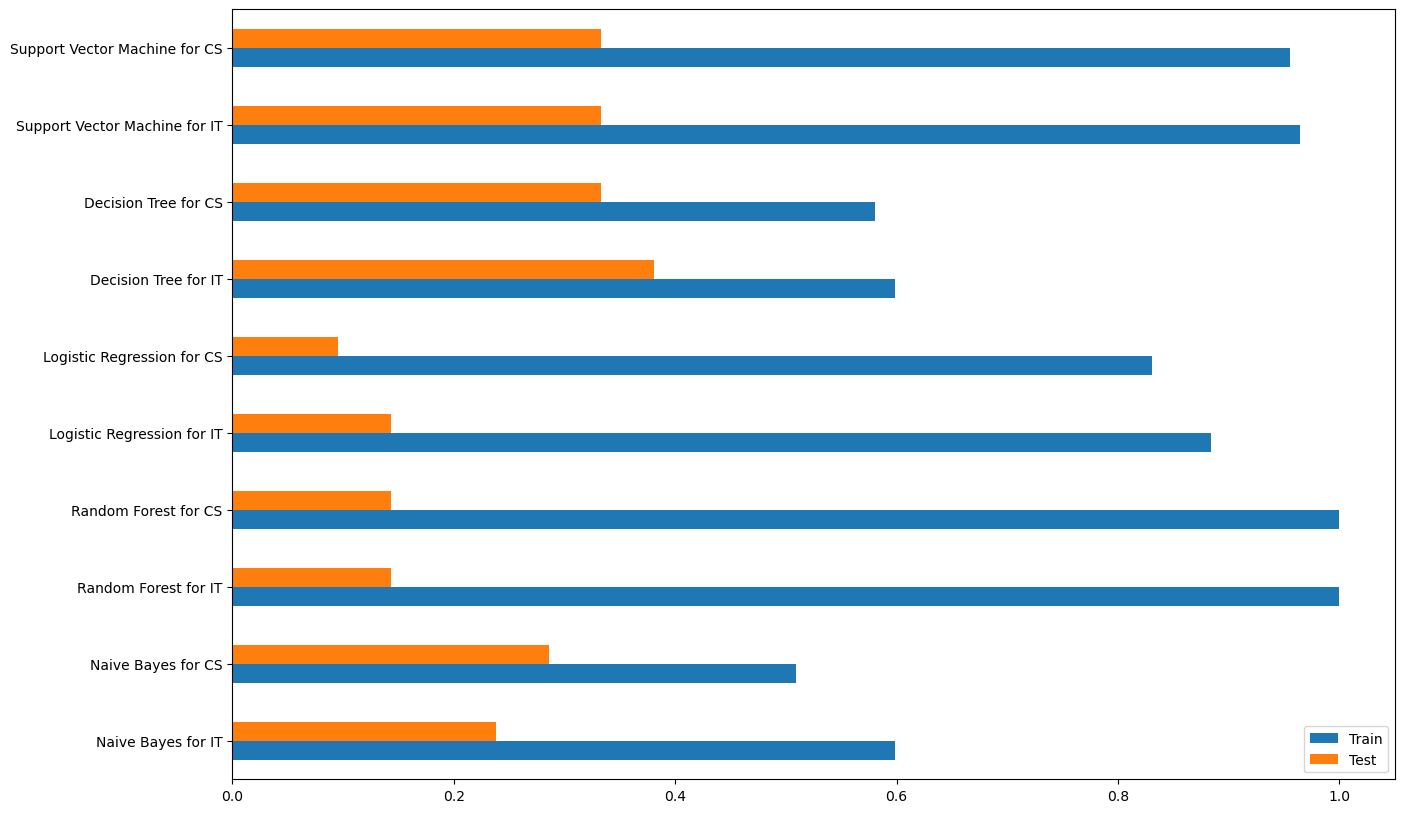

In [338]:
scores_data = pd.DataFrame(scores)

scores_data.plot(kind='barh', figsize=(15,10))

plt.legend(loc = 'lower right')

# TRAINED MODEL

In [176]:
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [262]:
#RANDOM FOREST FOR IT WITH SMOTE 
pickle.dump(rfc_IT, open('ProjectModel_ITrfc_SMOTEE.pkl', 'wb'))

In [263]:
#RANDOM FOREST FOR CS WITH SMOTE 
pickle.dump(rfc_CS, open('ProjectModel_CSrfc_SMOTEE.pkl', 'wb'))

In [264]:
#TEST DATA NAIVE BAYES FOR IT WITH SMOTE 
pickle.dump(naive_IT, open('ProjectModel_ITnaive_SMOTEE.pkl', 'wb'))

In [265]:
#TEST DATA NAIVE BAYES FOR CS WITH SMOTE 
pickle.dump(naive_CS, open('ProjectModel_CSnaive_SMOTEE.pkl', 'wb'))

### BATCH PREDICTION

In [177]:
test_model_IT = pickle.load(open('ProjectModel_ITrfc_SMOTEE.pkl', 'rb'))

In [178]:
test_model_CS = pickle.load(open('ProjectModel_CSrfc_SMOTEE.pkl', 'rb'))

In [201]:
# RANDOM FOREST RANGING FROM 70% TO 90% PERFORMANCE ACCURACE FOR IT
new_Xdata_IT = X_IT.sample(30)
new_Ydata_IT = Cat_Y[new_Xdata_IT.index.values]
pred_IT = test_model_IT.predict(new_Xdata_IT)

print(new_Xdata_IT,'\n\n', new_Ydata_IT)
print('\n\n', pred_IT)

res_cm_IT = confusion_matrix(new_Ydata_IT, pred_IT)
print('\n\nConfusion Matrix:\n\n', res_cm_IT)
res_acc_IT = accuracy_score(new_Ydata_IT, pred_IT)
print('\n\nAccuracy Score:', res_acc_IT)


    Sex  Shiftee  ComProg_1_1st  ComProg_1_2nd  ComProg_2_1st  ComProg_2_2nd  \
75  1.0      0.0           1.75              0           2.75           0.00   
11  0.0      1.0           2.75              0           5.00           2.75   
49  1.0      1.0           2.25              0           2.25           0.00   
74  1.0      0.0           1.50              0           3.00           0.00   
41  0.0      0.0           3.00              0           5.00           3.00   
17  0.0      0.0           2.50              0           2.50           0.00   
31  1.0      0.0           3.00              0           5.00           2.00   
56  0.0      0.0           5.00              2           3.00           0.00   
35  1.0      0.0           2.50              0           2.25           0.00   
97  1.0      0.0           1.50              0           2.00           0.00   
65  1.0      0.0           5.00              3           5.00           3.00   
23  1.0      1.0           2.50         

In [202]:
#BATCH PREDICTION SAMPLE(30)
test_model_pred_IT = {'Random Forest Classifier for IT' : pred_IT}
for v,k in test_model_pred_IT.items():
    print(f'{v} :\n{classification_report(new_Ydata_IT, test_model_pred_IT[v])}\n\n\n')

Random Forest Classifier for IT :
                                precision    recall  f1-score   support

                   Academician       1.00      0.50      0.67         6
      Administrative Assistant       0.57      0.80      0.67         5
Software Engineer / Programmer       0.50      0.80      0.62         5
  Technical Support Specialist       0.92      0.79      0.85        14

                      accuracy                           0.73        30
                     macro avg       0.75      0.72      0.70        30
                  weighted avg       0.81      0.73      0.74        30






In [339]:
# RANDOM FOREST RANGING FROM 70% TO 90% PERFORMANCE ACCURACE FOR CS
new_Xdata_CS = X_CS.sample(30)
new_Ydata_CS = Cat_Y[new_Xdata_CS.index.values]
pred_CS = test_model_CS.predict(new_Xdata_CS)

print(new_Xdata_CS,'\n\n', new_Ydata_CS)
print('\n\n', pred_CS)

res_cm_CS = confusion_matrix(new_Ydata_CS, pred_CS)
print('\n\nConfusion Matrix:\n\n', res_cm_CS)
res_acc_CS = accuracy_score(new_Ydata_CS, pred_CS)
print('\n\nAccuracy Score:', res_acc_CS)

     Sex  Shiftee  ComProg_1_1st  ComProg_1_2nd  ComProg_2_1st  ComProg_2_2nd  \
32   1.0      0.0           2.75              0           3.00            0.0   
0    1.0      1.0           2.00              0           2.75            0.0   
16   1.0      0.0           5.00              3           2.50            0.0   
46   0.0      1.0           2.25              0           3.00            0.0   
63   1.0      0.0           2.75              0           2.75            0.0   
39   0.0      0.0           2.50              0           2.75            0.0   
34   0.0      0.0           3.00              0           2.50            0.0   
21   1.0      0.0           2.50              0           1.50            0.0   
84   0.0      0.0           1.75              0           1.75            0.0   
70   1.0      0.0           3.00              0           2.50            0.0   
25   1.0      0.0           2.25              0           2.00            0.0   
102  0.0      0.0           

In [340]:
#BATCH PREDICTION SAMPLE(30)
test_model_pred_CS = {'Random Forest Classifier for CS' : pred_CS}
for v,k in test_model_pred_CS.items():
    print(f'{v} :\n{classification_report(new_Ydata_CS, test_model_pred_CS[v])}\n\n\n')

Random Forest Classifier for CS :
                                precision    recall  f1-score   support

                   Academician       1.00      0.83      0.91         6
      Administrative Assistant       1.00      0.88      0.93         8
Software Engineer / Programmer       0.73      1.00      0.84         8
  Technical Support Specialist       0.86      0.75      0.80         8

                      accuracy                           0.87        30
                     macro avg       0.90      0.86      0.87        30
                  weighted avg       0.89      0.87      0.87        30




